
### 手錶型號隨錶齡價格波動分析

**目標：**  
觀察不同手錶型號在隨錶齡（Age）變化時的價格波動情形，找出：  
- 價格變化最劇烈（波動最大、不穩定）的型號（Top 8）  
- 升值最明顯的型號（Top 8）  
- 貶值最明顯的型號（Top 8）

**資料來源與欄位需求：**  
- `reference number`：手錶型號  
- `age`：錶齡（年）  
- `price`：價格  

**篩選條件：**  
僅納入資料筆數 **大於 10 筆以上** 的型號，確保統計結果具代表性。  

**分析與視覺化：**  
透過圖表（如折線圖或散點圖）呈現各型號隨錶齡的價格變化趨勢，  
以直觀方式觀察哪些型號的價格變動幅度較大、  
哪些型號具有明顯的升值或貶值趨勢。  

**應用目的：**  
本分析有助於識別：  
- 可關注後續漲跌的高波動型號  
- 保值率較高的穩定型號  
- 提供投資或收藏參考依據。



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib
from scipy import stats

matplotlib.rc("font", family="Microsoft JhengHei")  # Windows 範例
matplotlib.rc("axes", unicode_minus=False)

In [2]:
connection=sqlite3.connect("data/rolex.db")
a_df= pd.read_sql("""
                SELECT* 
                FROM rolex 
                WHERE [reference number] IN
                    (SELECT ref
                    FROM value_retention_rate
                    LIMIT 8) ;
                """ ,con= connection)

d_df= pd.read_sql("""
                SELECT* 
                FROM rolex 
                WHERE [reference number] IN
                    (SELECT ref
                    FROM value_retention_rate
                    ORDER BY slope
                    LIMIT 8) ;
                """ ,con= connection)
connection.close()

In [3]:
a_df.groupby("reference number").agg(
    mean_price=("price", "mean"),
    mean_age=("age", "mean"),
    count=("reference number", "count")
)

,mean_price,mean_age,count
reference number,,,
116508 Paul Newman,60692.000000,1.428571,14
124300-0003,10757.411765,1.470588,17
228238-0006,49886.333333,1.166667,12
2940,4500.700000,78.750000,20
3372,5687.200000,78.666667,15
6548,3194.250000,58.062500,16
69190,3631.870968,35.483871,31
9522,6367.909091,62.363636,11


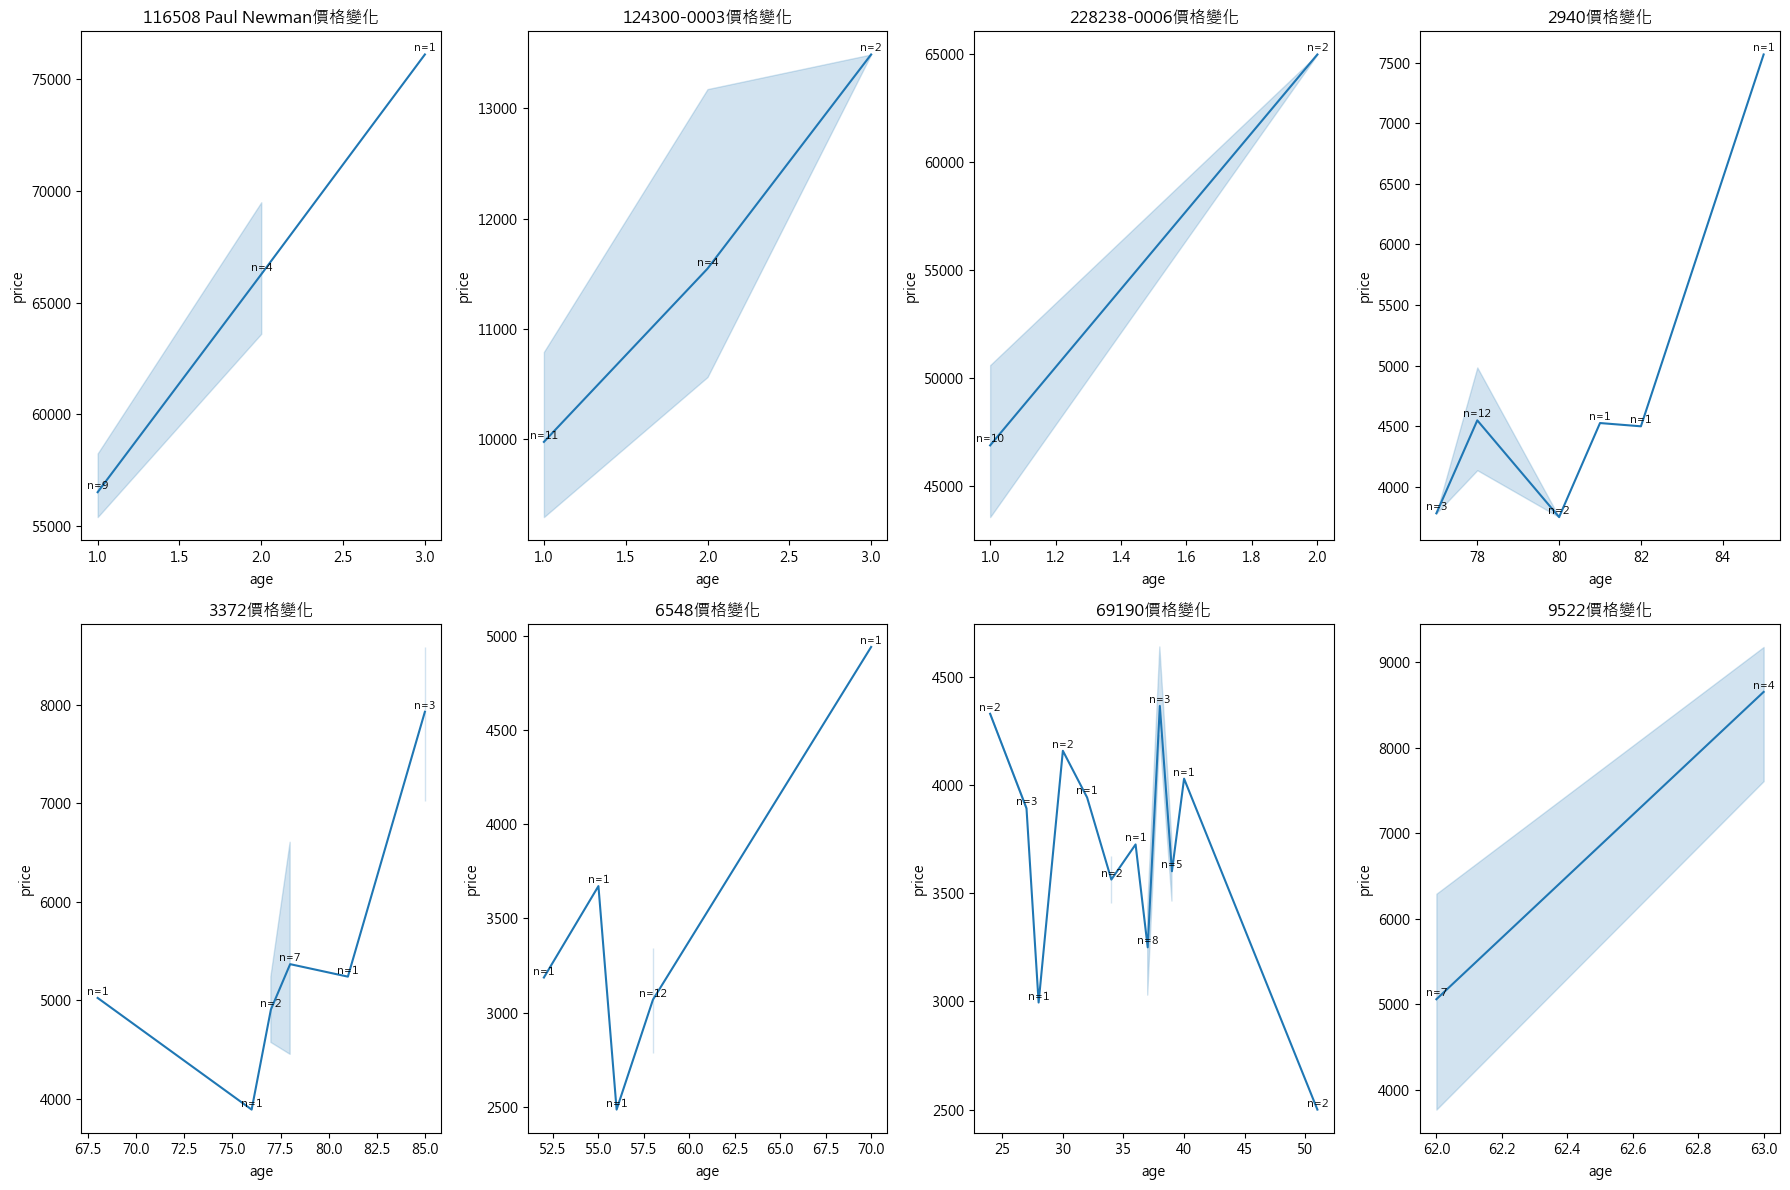

In [12]:
fig,axes= plt.subplots(2,4, figsize=(18,12))
axes = axes.flatten()

for idx,ref in enumerate(a_df["reference number"].unique()):
    ref_data=a_df[a_df["reference number"]== ref]
    sns.lineplot(data= ref_data, x="age",y="price",ax=axes[idx])

    age_counts= ref_data.groupby("age").size()
    for age, count in age_counts.items():
        y_pos= ref_data[ref_data["age"]== age]["price"].mean()
        axes[idx].text(age, y_pos, f"n={count}", ha="center", va="bottom",fontsize=8)
    axes[idx].set_title(f"{ref }價格變化")
plt.tight_layout()

In [5]:
d_df.groupby("reference number").agg(
    mean_price=("price", "mean"),
    mean_age=("age", "mean"),
    count=("reference number", "count")
)

,mean_price,mean_age,count
reference number,,,
116576TBR,427690.052632,2.789474,19
116589RBR,71262.285714,14.928571,14
116758SARU,187350.090909,13.818182,11
126281,22771.454545,2.454545,11
126603-0001,18645.000000,2.384615,13
126655-0002,35389.363636,1.090909,11
278241,15826.152174,1.195652,46
278343RBR,18324.000000,1.846154,13


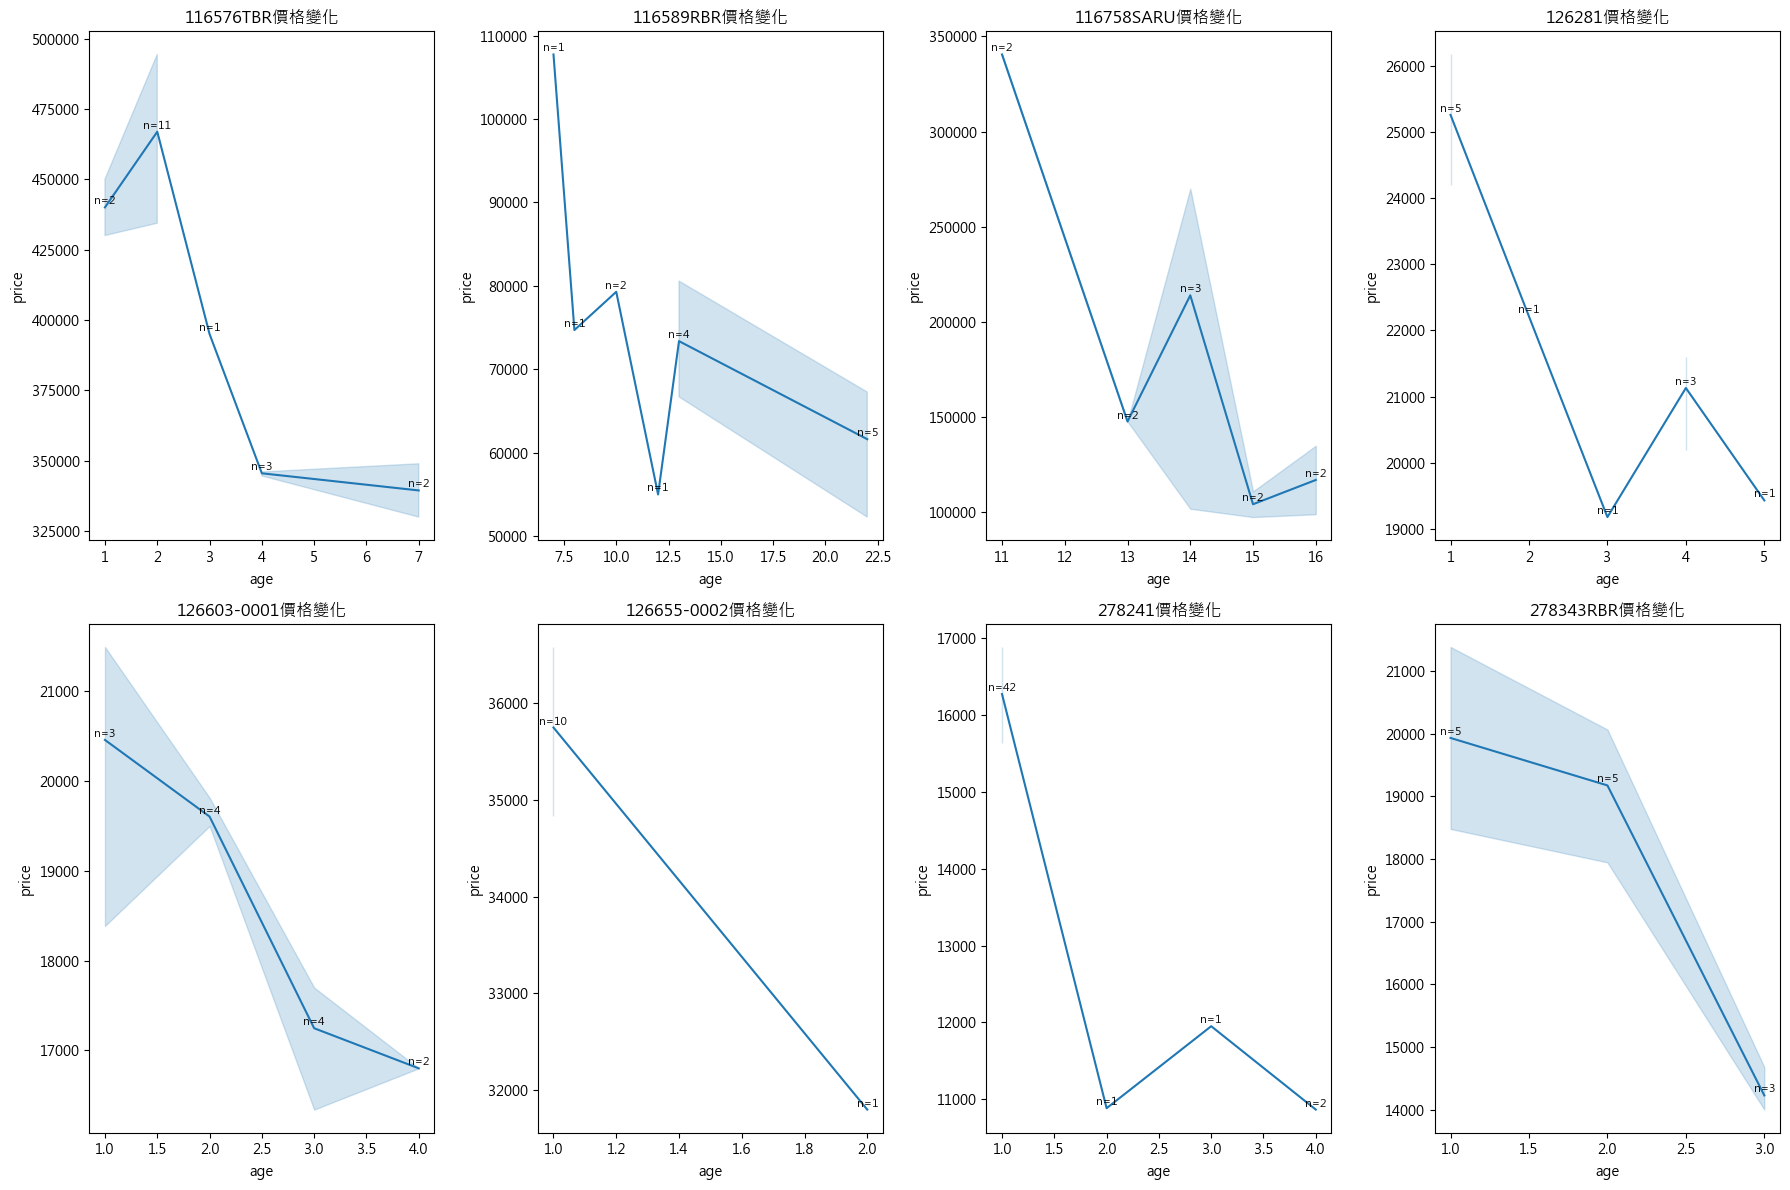

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
axes = axes.flatten()

for idx, ref in enumerate(d_df["reference number"].unique()):
    # 篩選特定reference number的資料
    ref_data = d_df[d_df["reference number"] == ref]
    
    # 繪製線圖
    sns.lineplot(data=ref_data, x="age", y="price", ax=axes[idx])
    
    # 計算每個age的數量
    age_counts = ref_data.groupby("age").size()
    
    # 在每個資料點上方添加數量標籤
    for age, count in age_counts.items():
        # 取得該age的平均price作為y位置
        y_pos = ref_data[ref_data["age"] == age]["price"].mean()
        axes[idx].text(age, y_pos, f'n={count}',  
                      ha='center', va='bottom', fontsize=8)
    
    axes[idx].set_title(f"{ref}價格變化")

plt.tight_layout()